In [650]:
import pandas as pd
import numpy as np

In [651]:
df = pd.read_csv("./mail_data.csv")

In [652]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [653]:
# cleaning
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [655]:
def category(text:str):
    if text == "ham":
        return 0
    return 1

In [656]:
df['Category'] = df['Category'].apply(category)

In [657]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [658]:
df.rename(columns={"Category" : "target" , "Message" : "msg"}, inplace=True)

In [659]:
df.head()

,target,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [660]:
import nltk

In [661]:
# nltk.download("punkt")

In [662]:
df['char_count'] = df['msg'].apply(len)

In [663]:
df['word_count'] = df['msg'].apply(lambda x : len(nltk.word_tokenize(x)))


In [664]:
df['sent_count'] = df['msg'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [665]:
df.head()

,target,msg,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [666]:
df[['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.826992,2.004666
std,59.926946,13.853616,1.539516
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [667]:
# Spam
df[df['target'] == 1][['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.029451
std,29.980287,7.036282,1.552198
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [668]:
# ham
df[df['target'] == 0][['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.425699,1.846010
std,58.434864,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [669]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: ylabel='Count'>

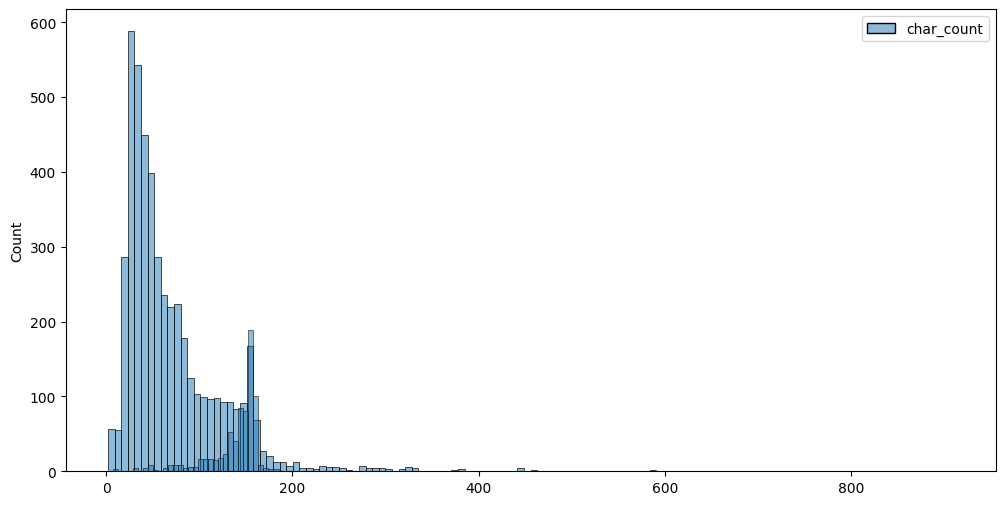

In [670]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0][['char_count']])
sns.histplot(df[df['target'] == 1][['char_count']], color='red')

<Axes: ylabel='Count'>

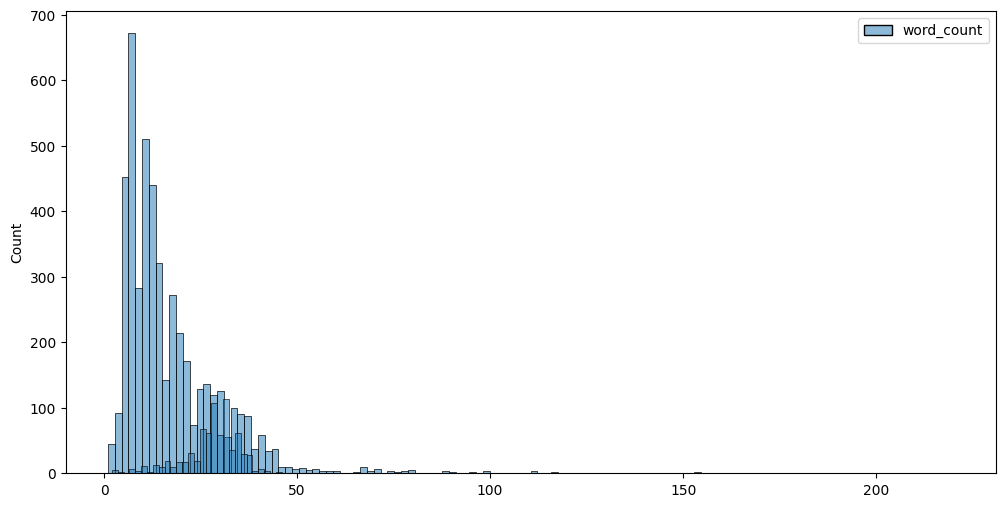

In [671]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0][['word_count']])
sns.histplot(df[df['target'] == 1][['word_count']], color='red')

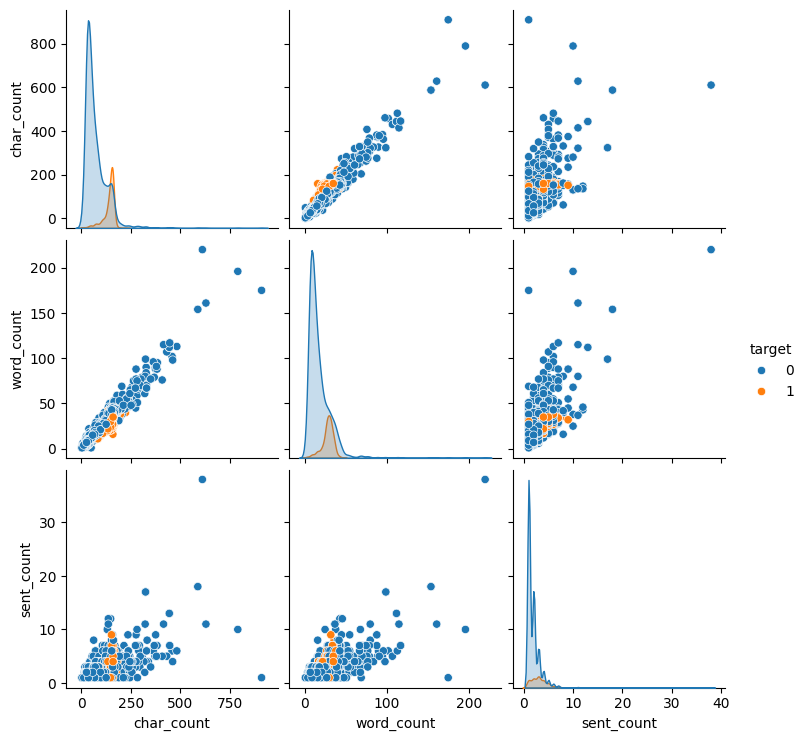

In [672]:
sns.pairplot(df,hue='target')

In [673]:
for_heatmap = df[['target','char_count', 'word_count', 'sent_count']].corr()

<Axes: >

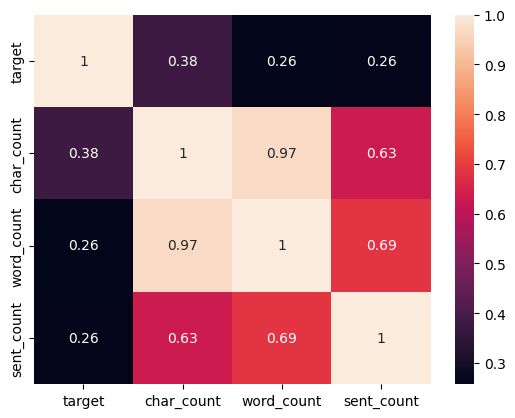

In [674]:
sns.heatmap(for_heatmap, annot=True)

Preprecessing

In [675]:
# Lower Case
# Tokenization
# REmove Special Char
# Remove stop word and punctuation
# Stemming

In [676]:
df['msg']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: msg, Length: 5572, dtype: object

In [677]:
# nltk.download("stopwords")

In [678]:
import string
string.punctuation

from nltk.corpus import stopwords
# stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [679]:
def text_transform(text : str) :
    punctuation = string.punctuation
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in punctuation]
    tokens = [ps.stem(token) for token in tokens]
    
    return " ".join(tokens)

In [680]:
def list_transform(text : str) :
    punctuation = string.punctuation
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in punctuation]
    tokens = [ps.stem(token) for token in tokens]
    
    return tokens

In [681]:
# make_transform("hi How are you!. prafull? singing singer sing") + make_transform("this is new for me as laptop user")

In [682]:
df['transform_msg_list'] = df['msg'].apply(list_transform)

In [683]:
df['transform_msg'] = df['msg'].apply(text_transform)

In [684]:
df.head()

,target,msg,char_count,word_count,sent_count,transform_msg_list,transform_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]",nah think goe usf live around though


In [685]:
df[df['target'] == 1]['transform_msg']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transform_msg, Length: 747, dtype: object

In [686]:
total_words_in_spam = []
for word in df[df['target'] == 1]['transform_msg_list']:
    total_words_in_spam += word

print(total_words_in_spam)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [687]:
len(total_words_in_spam)

11506

In [688]:
from collections import Counter
spam_counter = Counter(total_words_in_spam)
spam_counter.most_common(30)

[('call', 362),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('text', 139),
 ('u', 138),
 ('mobil', 135),
 ('4', 120),
 ('stop', 118),
 ('claim', 113),
 ('repli', 112),
 ('prize', 92),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 71),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('week', 60),
 ('contact', 60),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('guarante', 51)]

<Axes: ylabel='1'>

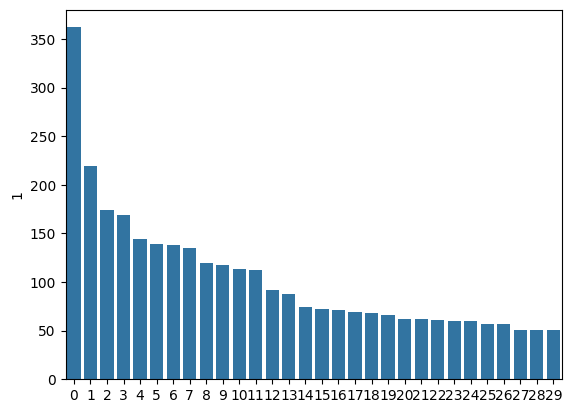

In [689]:
sns.barplot(pd.DataFrame(spam_counter.most_common(30))[1])

In [690]:
total_words_in_ham = []
for word in df[df['target'] == 0]['transform_msg_list']:
    total_words_in_ham += word

print(total_words_in_ham)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'way', 'u', 'feel', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 'ha', 'joke', 'ü', '

In [691]:
len(total_words_in_ham)

38819

In [692]:
ham_counter = Counter(total_words_in_ham)

In [693]:
ham_counter.most_common(30)

[('u', 994),
 ('go', 420),
 ('get', 359),
 ('gt', 318),
 ('lt', 316),
 ('2', 304),
 ('come', 298),
 ('call', 293),
 ('know', 249),
 ('ur', 247),
 ('love', 247),
 ('ok', 246),
 ('like', 246),
 ('got', 245),
 ('good', 232),
 ('time', 229),
 ('day', 218),
 ('want', 213),
 ('need', 175),
 ('one', 175),
 ('ü', 173),
 ('4', 169),
 ('lor', 162),
 ('home', 161),
 ('sorri', 156),
 ('see', 154),
 ('think', 152),
 ('take', 150),
 ('da', 150),
 ('still', 149)]

<Axes: ylabel='1'>

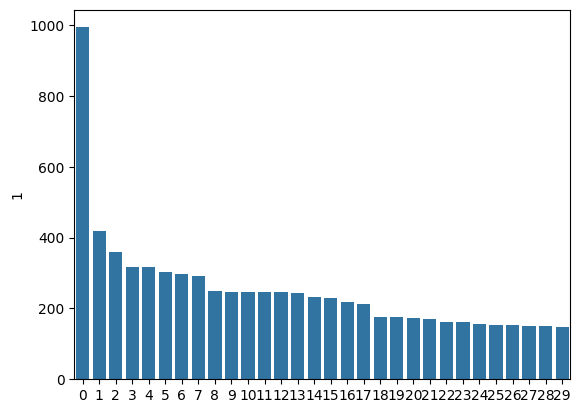

In [694]:
sns.barplot(pd.DataFrame(ham_counter.most_common(30))[1])

MODEL BUILDING

In [695]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=3000) # bag of words
tfidf = TfidfVectorizer(max_features=3000)

In [696]:
X = cv.fit_transform(df['transform_msg']).toarray()

In [697]:
# X = np.hstack((X, df['char_count'].values.reshape(-1,1)))

In [698]:
X.shape

(5572, 3000)

In [699]:
y = df['target'].values

In [700]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [701]:
from sklearn.model_selection import train_test_split

In [702]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Naive bayes

In [703]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [704]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [705]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8565022421524664
[[819 138]
 [ 22 136]]
0.49635036496350365


In [706]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9766816143497757
[[946  11]
 [ 15 143]]
0.9285714285714286


Bernoullie works well on bag of words

In [707]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9739910313901345
[[955   2]
 [ 27 131]]
0.9849624060150376


In [708]:
# tfidf --> mnb

Other ML algo

In [709]:
def return_accuraccy_and_precision(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train,y_train)
    predicted = clf.predict(x_test)
    return {
        "accuracy" : accuracy_score(predicted, y_test),
        "precision" : precision_score(predicted, y_test)
    }

In [710]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [711]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
dt = DecisionTreeClassifier(max_depth=5)
svc = SVC(kernel='sigmoid', gamma=1.0)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
kn = KNeighborsClassifier()

In [712]:
ml_algo = {
    "LogisticRegression" : lr,
    "DecisionTreeClassifier" : dt,
    "SVC" : svc,
    "RandomForestClassifier" : rfc,
    "MultinomialNB" : mnb,
    "BernoulliNB" : bnb,
    "ExtraTreeClassifier" : etc,
    "KN" : kn
}

In [713]:
accuracy_list = []
precision_list = []
algo_list = []

for key in ml_algo:
    clf = ml_algo[key]
    result = return_accuraccy_and_precision(clf, X_train, x_test, y_train, y_test)
    accuracy = result['accuracy']
    precision = result['precision']

    algo_list.append(key)
    accuracy_list.append(accuracy)
    precision_list.append(precision)

In [714]:
observation = pd.DataFrame({"ml_algo" : algo_list,"accuracy" : accuracy_list ,"precision" : precision_list})

In [715]:
observation.sort_values(by='accuracy', ascending=False)

,ml_algo,accuracy,precision
4,MultinomialNB,0.976682,0.905063
3,RandomForestClassifier,0.974888,0.835443
6,ExtraTreeClassifier,0.974888,0.835443
5,BernoulliNB,0.973991,0.829114
0,LogisticRegression,0.971300,0.829114
2,SVC,0.923767,0.677215
1,DecisionTreeClassifier,0.910314,0.411392
7,KN,0.909417,0.360759


In [716]:
import pickle

In [719]:
pickle.dump(mnb,open("mnb.pkl","wb"))
pickle.dump(cv,open("cv.pkl", "wb"))